In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [99]:
calories=pd.read_csv('/content/calories.csv')


In [100]:
calories.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [101]:
exercise=pd.read_csv('/content/exercise.csv')

In [102]:
exercise.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [103]:
calories=pd.concat([exercise,calories['Calories']],axis=1)

In [104]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [105]:
calories.shape

(15000, 9)

In [106]:
calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [107]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


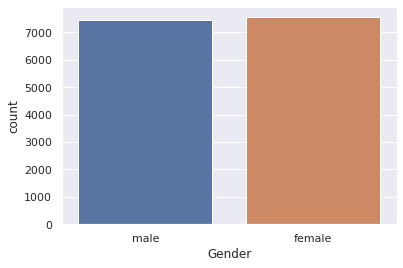

In [108]:
sns.countplot(calories['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


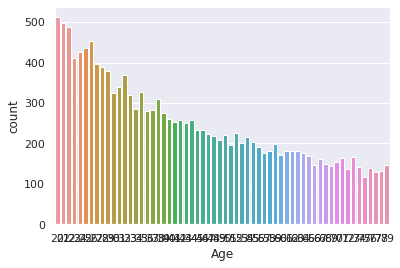

In [109]:
sns.countplot(calories['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


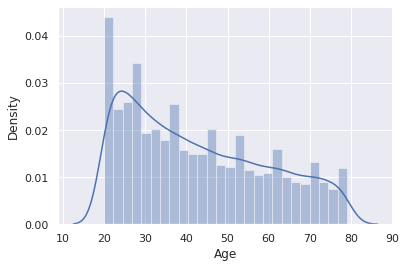

In [110]:
sns.distplot(calories['Age'])

In [111]:
correlation=calories.corr()

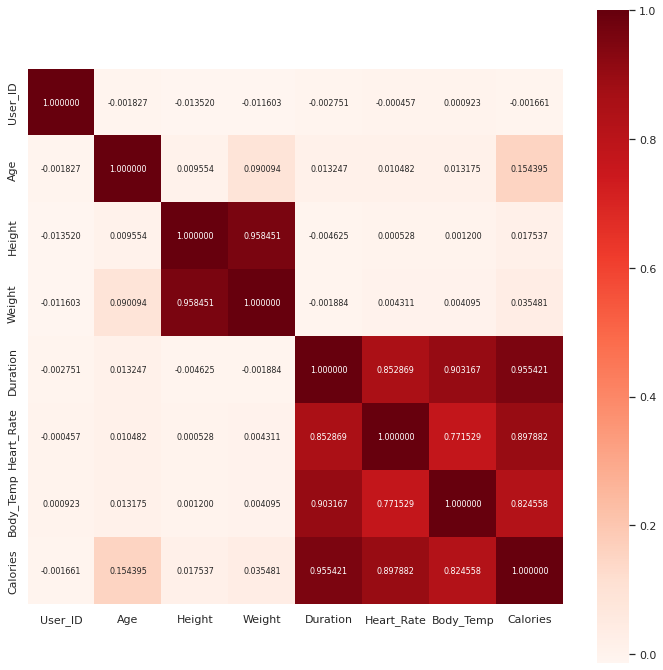

In [112]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [113]:
calories.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [114]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [115]:
X=calories.drop(columns=['User_ID','Calories'],axis=1)
Y=calories['Calories']

In [116]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [117]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [118]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [119]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.1,random_state=2)

In [120]:
print(X.shape, X_test.shape, X_train.shape)

(15000, 7) (1500, 7) (13500, 7)


In [121]:
model=LinearRegression()

In [122]:
model.fit(X_train,Y_train) #trainig the data

LinearRegression()

In [123]:
training_data_prediction=model.predict(X_train)

In [124]:
print(training_data_prediction)#now we can compare the predicted values with the original Y_test to check the accuracy of our model

[ 11.73569013 110.184646    32.40292442 ... 111.61622211 179.32919357
  41.43576884]


R^2 value lies between 0 to 1
model is considered more accurate if its R^2 value is close to 1

In [125]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)#comparing the original values of Y_train and the values predicted by our model
print('R squared vale : ', r2_train)

R squared vale :  0.9672931620848034


In [126]:
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

[137.54080378 182.38544385  50.1218194  ...  55.69870167  73.2054927
 178.18338805]


In [127]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)#comparing the original test data with predicted data
print("R square value is: ",r2_test)

R square value is:  0.9663192074377056


In [132]:
input_data=(0,20,180,67,81,90,40)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("Calories burnt are: ",prediction,"Cal")

Calories burnt are:  [498.3516172] Cal


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [129]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [131]:
print("Mean Absolute Error:",mae)

Mean Absolute Error: 8.353368601119657
